<a href="https://colab.research.google.com/github/godnik0154/Stock-Price-Predictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing all necessary libraries**

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=9773eb67bf9a8c5876d2effb53334786ba76b6e4c15264e747f15d097fff8e15
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

#**Data collection and exploration**

In [ ]:
# define the ticker you will use
nio = yf.Ticker('HDFC')
#Display stock information, it will give you a summary description of the ticker
nio.info

{'52WeekChange': 2.5695143,
 'SandP52WeekChange': 0.3509593,
 'address1': 'Building 20',
 'address2': 'No. 56 AnTuo Road Anting Town Jiading District',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 44.99,
 'askSize': 1200,
 'averageDailyVolume10Day': 56191987,
 'averageVolume': 65723317,
 'averageVolume10days': 56191987,
 'beta': 2.564392,
 'beta3Year': None,
 'bid': 44.98,
 'bidSize': 1300,
 'bookValue': 17.283,
 'category': None,
 'circulatingSupply': None,
 'city': 'Shanghai',
 'companyOfficers': [],
 'country': 'China',
 'currency': 'USD',
 'currentPrice': 44.965,
 'currentRatio': 3.06,
 'dateShortInterest': 1626307200,
 'dayHigh': 45.2,
 'dayLow': 41.54,
 'debtToEquity': 50.446,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': None,
 'earningsQuarterlyGrowth': None,
 'ebitda': -2301369088,
 'ebitdaMargins': -0.10063,
 'enterpriseToEbitda': -15.936,
 'enterpriseToRevenue': 1.604,
 'enterpriseValue': 36675444736,
 'e

#**Data preparation and cleaning for Regression analysis**

In [ ]:
history = nio.history(period="Max")
df = pd.DataFrame(history)
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12,6.00,6.93,5.35,6.60,66849000,0,0
2018-09-13,6.62,12.69,6.52,11.60,158346500,0,0
2018-09-14,12.66,13.80,9.22,9.90,172473600,0,0
2018-09-17,9.61,9.75,8.50,8.50,56323900,0,0
2018-09-18,8.73,9.10,7.67,7.68,41827600,0,0
2018-09-19,7.88,9.15,7.54,8.50,48306500,0,0
2018-09-20,9.07,9.47,8.42,8.78,40275000,0,0
2018-09-21,9.05,9.07,8.50,8.59,15118500,0,0
2018-09-24,8.32,8.39,7.85,7.87,16297900,0,0


In [ ]:
# defining x and y 
x = df.index
y = df['Close']
y

Date
2018-09-12     6.600000
2018-09-13    11.600000
2018-09-14     9.900000
2018-09-17     8.500000
2018-09-18     7.680000
                ...    
2021-07-26    43.169998
2021-07-27    39.360001
2021-07-28    41.840000
2021-07-29    42.619999
2021-07-30    44.965000
Name: Close, Length: 726, dtype: float64

In [ ]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

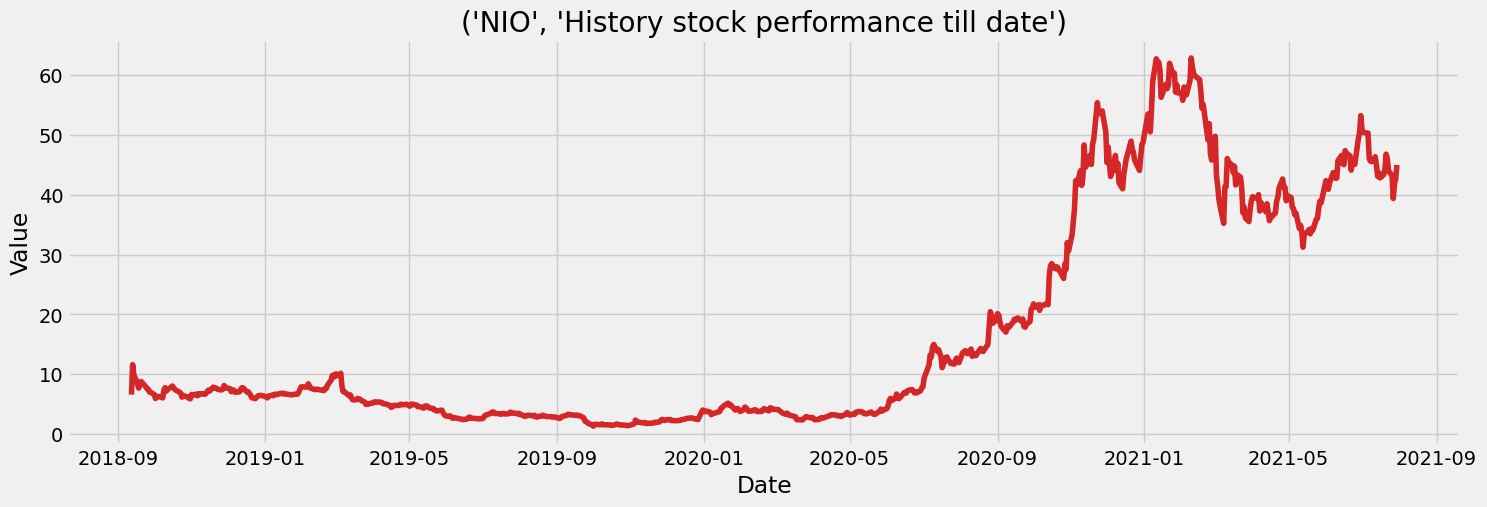

In [ ]:
stock_name= "NIO"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [ ]:
# Data Processing and scaling
df.reset_index(inplace=True) # to reset index and convert it to column

In [ ]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12,6.00,6.93,5.35,6.6,66849000,0,0
1,2018-09-13,6.62,12.69,6.52,11.6,158346500,0,0


In [ ]:
df.drop(columns=['Dividends','Stock Splits']).head(2) # We are dropping un necessary columns from the set

,Date,Open,High,Low,Close,Volume
0,2018-09-12,6.00,6.93,5.35,6.6,66849000
1,2018-09-13,6.62,12.69,6.52,11.6,158346500


In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,726.000000,726.000000,726.000000,726.000000,7.260000e+02,726.0,726.0
mean,16.663388,17.235275,16.033196,16.669952,6.931465e+07,0.0,0.0
std,18.072904,18.628109,17.405953,18.059001,7.239510e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,3.440000,3.540000,3.320000,3.440000,2.231295e+07,0.0,0.0
50%,6.770000,6.980000,6.530000,6.790000,4.958560e+07,0.0,0.0
75%,33.779999,34.712499,32.492500,33.777501,8.444840e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [ ]:
print(len(df))
649

726


649

In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

#**Splitting the Data**

In [ ]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

#**Regression algorithm model implementation**

##**Equation for linear regression**

**Linear Regression Formula**


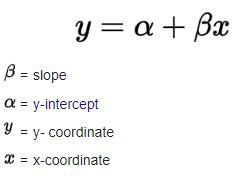

In [ ]:
from IPython.display import Image
print("**Linear Regression Formula**")
Image(filename="lineformula.jpg", width= 400, height=200)

#**Regression Formula**

**Regression Formula**


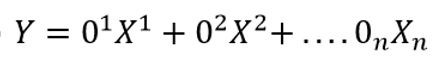

In [ ]:
from IPython.display import Image
print("**Regression Formula**")
Image(filename="bin.jpg", width= 380, height=110)

Where, x1, x2,….xn represents the independent variables while the coefficients θ1, θ2, θn represent the weights.

In [ ]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
(551, 4)
(98, 4)
(551,)
(98,)

(617, 4)
(109, 4)
(617,)
(109,)


(98,)

#**Prediction and Estimation**

##**The coefficient of determination R²**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)


regression coefficient [-7.33849464e-01  1.01851192e+00  7.12608253e-01 -9.60188817e-10]
regression intercept 0.008068603648911932


In [ ]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9739279540068604


#**Prediction**

In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

          Open       High        Low     Volume
617  51.599998  51.849998  46.009998   95513800
618  47.000000  47.950001  44.619999  100315500
619  48.549999  50.419998  47.630001   94238500
620  46.110001  47.130001  42.660000  161334000
621  44.580002  45.080002  41.110001  107863400


In [ ]:
predicted.shape

(109,)

#**Prediction Table of Actual Prices vs Predicted values**

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
617,46.810001,47.646672
618,45.779999,46.055049
619,49.759998,49.584092
620,43.290001,44.417694
621,41.529999,42.399334
622,39.279999,40.099231
623,38.110001,34.299191
624,35.209999,37.821153
625,41.349998,41.217256
626,41.320000,42.682741


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,109.000000,109.000000
mean,41.363532,41.515819
std,4.603500,4.650928
min,31.219999,31.846707
25%,37.759998,37.769547
50%,41.349998,41.974709
75%,44.965000,44.925886
max,53.200001,53.660623


#**Model Evaluation**

##**Mean Absolute Error (MAE):**

**Mean Absolute Error (MAE)**


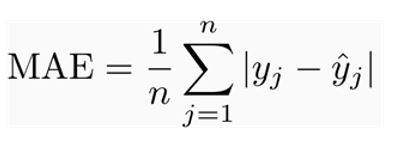

In [ ]:
print("**Mean Absolute Error (MAE)**")
from IPython.display import Image
Image(filename="map.jpg", width= 600, height=200)

##**Root mean squared error (RMSE):**

**Root mean squared error (RMSE)**


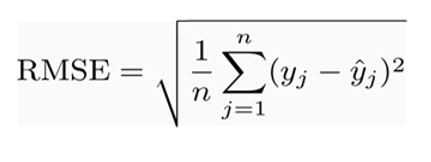

In [ ]:
from IPython.display import Image
print("**Root mean squared error (RMSE)**")
Image(filename="rmse.jpg", width= 600, height=250)

##**Mean squared error (MSE):**

** Mean squared error (MSE)**


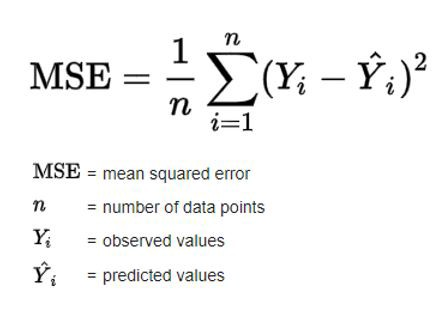

In [ ]:
from IPython.display import Image
print("** Mean squared error (MSE)**")
Image(filename="bigmse.jpg", width= 700, height=750)

**List of equations**


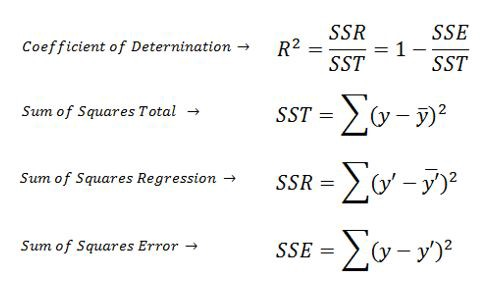

In [ ]:
from IPython.display import Image
print("**List of equations**")
Image(filename="bigformula.jpg", width= 700, height=750)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.5382112739784346
Mean Squared Error (MSE) : 0.5474552117639078
Root Mean Squared Error (RMSE): 0.7399021636432129


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,109.000000,109.000000
mean,41.363532,41.515819
std,4.603500,4.650928
min,31.219999,31.846707
25%,37.759998,37.769547
50%,41.349998,41.974709
75%,44.965000,44.925886
max,53.200001,53.660623


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.63318372677978


Text(0, 0.5, 'Predicted Price')

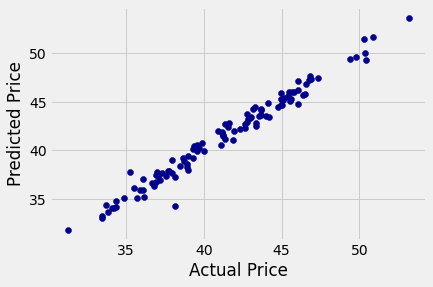

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0.5, 1.0, 'Nio prediction chart')

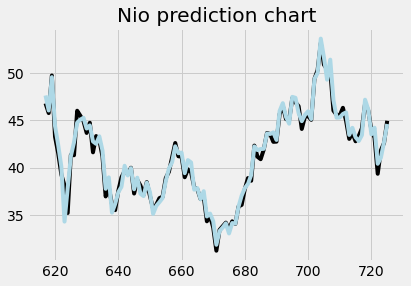

In [ ]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Nio prediction chart")